In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Build the Sparse AutoEncoder (2.3 Million Param)

In [2]:

## Encoder
enc_input= tf.keras.layers.Input(shape=(64,128,128,1))

# L[1]
x= tf.keras.layers.Conv3D(filters=32, kernel_size=3, strides= (2, 2, 2), padding='same', activation='relu', name='L1')(enc_input)
x= tf.keras.layers.BatchNormalization()(x)

# L[2]
x= tf.keras.layers.Conv3D(filters=64, kernel_size=3, strides= (2, 2, 2), padding='same', activation='relu', name='L2')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[3]
x= tf.keras.layers.Conv3D(filters=128, kernel_size=3, strides= (2, 2, 2), padding='same', activation='relu', name='L3')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[4]
x= tf.keras.layers.Conv3D(filters=256, kernel_size=3, strides= (2, 2, 2), padding='same', activation='sigmoid', name='L4')(x) #sigmoid for the code layer
x= tf.keras.layers.BatchNormalization()(x)
enc_output=  tf.keras.layers.Dropout(rate=0.1, name='code')(x)


## Decoder
# L[5]
x= tf.keras.layers.Conv3DTranspose(filters=128, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(enc_output)
x= tf.keras.layers.BatchNormalization()(x)

# L[6]
x= tf.keras.layers.Conv3DTranspose(filters=64, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[7]
x= tf.keras.layers.Conv3DTranspose(filters=32, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[8]
x= tf.keras.layers.Conv3DTranspose(filters=1, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(x)
dec_output= tf.keras.layers.BatchNormalization()(x)


auto_enc= tf.keras.Model(inputs=enc_input, outputs=dec_output)
auto_enc.summary()
auto_enc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 128, 1)  0         
                             ]                                   
                                                                 
 L1 (Conv3D)                 (None, 32, 64, 64, 32)    896       
                                                                 
 batch_normalization (BatchN  (None, 32, 64, 64, 32)   128       
 ormalization)                                                   
                                                                 
 L2 (Conv3D)                 (None, 16, 32, 32, 64)    55360     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 32, 32, 64)   256       
 hNormalization)                                                 
                                                             

In [9]:
#Load data set
#X_64t_128s_OK= np.load("X_64t_128s_OK.npy")




In [ ]:
#auto_enc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='mse')

#auto_enc.fit(x=X_64t_128s_OK, y=X_64t_128s_OK, validation_split=0.20, epochs=10, batch_size=128)


In [ ]:
#auto_enc.save("batch_128_v4")

In [9]:
# np.save("batch_64_v1_loss.npy", np.asarray(auto_enc.history.history['loss']))
# np.save("batch_64_v1_val_loss.npy", np.asarray(auto_enc.history.history['val_loss']))



In [41]:
X= 

(7, 64, 128, 128, 1)

In [12]:
auto_enc= tf.keras.models.load_model("batch_128_v4")
pred= auto_enc.predict(X)
pred.shape

28/28 [==============================] - 32s 1s/step


(890, 64, 128, 128, 1)

In [ ]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10,10))
axes[0].imshow(X_64t_128s_OK[-1,0])
axes[1].imshow(pred[-1,0])



### Load Video Dataset (np Array)

In [2]:
X_neg_MJR_part1= np.load("datasets/neg_dataset/X_neg_MJR_part1.npy")
#X_neg_MJR_part2= np.load("datasets/neg_dataset/X_neg_MJR_part2.npy")
X_neg_hamed_part1= np.load("datasets/neg_dataset/X_neg_hamed_part1.npy")
#X_neg_hamed_part2= np.load("datasets/neg_dataset/X_neg_hamed_part2.npy")
X_neg_sittichai_part1= np.load("datasets/neg_dataset/X_neg_sitticahi_part1.npy")
X_neg_sittichai_part2= np.load("datasets/neg_dataset/X_neg_sitticahi_part2.npy")

#### Combine all the dataset into One np Array

In [18]:
# vid1= X_neg_MJR_part1.shape[0]
# #vid2= X_neg_MJR_part2.shape[0]
# vid2= X_neg_hamed_part1.shape[0]
# #vid4= X_neg_hamed_part2.shape[0]
# vid3= X_neg_sittichai_part1.shape[0]
# vid4= X_neg_sittichai_part2.shape[0]
# tot_vid= vid1+vid2+vid3+vid4
# print("tot videos: " + str(tot_vid))

# X= np.zeros(shape=(tot_vid, 64, 128, 128, 1))
# X[0:vid1]= X_neg_MJR_part1
# X[vid1:vid1+vid2]= X_neg_hamed_part1
# X[vid1+vid2:vid1+vid2+vid3]= X_neg_sittichai_part1
# X[vid1+vid2+vid3:vid1+vid2+vid3+vid4]= X_neg_sittichai_part2
# print("X: " + str(X.shape))


#np.save("normal_data_661.npy", X)
X= np.load("normal_data_661.npy") #load the np varibale
print(X.shape)


(661, 64, 128, 128, 1)


### Train on Normal Videos

NameError: name 'auto_enc' is not defined

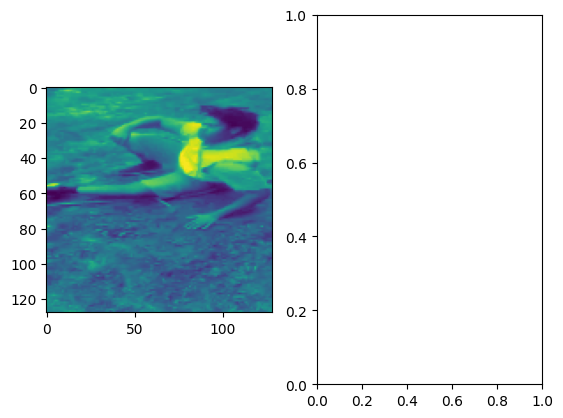

In [4]:
# auto_enc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
# hist= auto_enc.fit(x=X,y=X, validation_split=0.30, batch_size=1, epochs=100)

_,ax= plt.subplots(nrows=1,ncols=2)
ax[0].imshow(X[0,0]) 
ax[1].imshow(auto_enc.predict(X[0:2])[0,0])
#plt.plot(auto_enc.history.history['loss'])


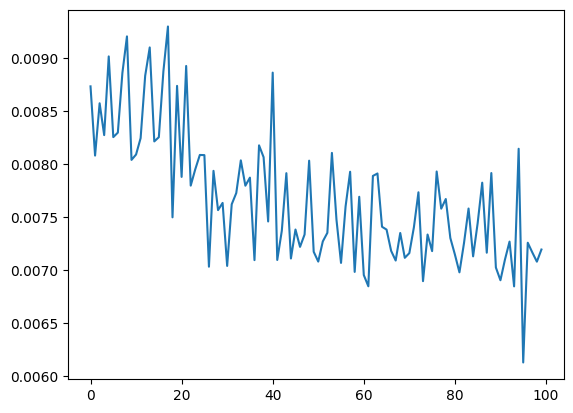

In [21]:
# auto_enc.save("auto_enc_normal_vid_661_epoch_10_100")
# np.save("auto_enc_normal_vid_661_epoch_10_100_loss.npy", np.asarray(hist.history['loss']))
# np.save("auto_enc_normal_vid_661_epoch_10_100_val_loss.npy", np.asarray(hist.history['val_loss']))
plt.plot(hist.history['val_loss'])

In [17]:
# hist= auto_enc.fit(x=X,y=X, validation_split=0.30, batch_size=1, epochs=100)
# auto_enc.save("auto_enc_normal_vid_661_epoch_10_100_100")
# np.save("auto_enc_normal_vid_661_epoch_10_100_100_loss.npy", hist.history['loss'])
# np.save("auto_enc_normal_vid_661_epoch_10_100_100_val_loss.npy", hist.history['val_loss'])

Epoch 1/100
462/462 [==============================] - 87s 188ms/step - loss: 0.0394 - val_loss: 0.0087
Epoch 2/100
462/462 [==============================] - 87s 187ms/step - loss: 0.0393 - val_loss: 0.0081
Epoch 3/100
462/462 [==============================] - 87s 188ms/step - loss: 0.0393 - val_loss: 0.0086
Epoch 4/100
462/462 [==============================] - 87s 189ms/step - loss: 0.0393 - val_loss: 0.0083
Epoch 5/100
462/462 [==============================] - 87s 189ms/step - loss: 0.0393 - val_loss: 0.0090
Epoch 6/100
462/462 [==============================] - 88s 190ms/step - loss: 0.0392 - val_loss: 0.0083
Epoch 7/100
462/462 [==============================] - 87s 189ms/step - loss: 0.0392 - val_loss: 0.0083
Epoch 8/100
462/462 [==============================] - 88s 190ms/step - loss: 0.0392 - val_loss: 0.0089
Epoch 9/100
462/462 [==============================] - 88s 191ms/step - loss: 0.0392 - val_loss: 0.0092
Epoch 10/100
462/462 [==============================] - 87s 189m

INFO:tensorflow:Assets written to: auto_enc_normal_vid_661_epoch_10_100_100/assets


INFO:tensorflow:Assets written to: auto_enc_normal_vid_661_epoch_10_100_100/assets


In [19]:
#hist= auto_enc.fit(x=X,y=X, validation_split=0.30, batch_size=1, epochs=300)
# auto_enc.save("auto_enc_normal_vid_661_epoch_10_100_100_300")
# np.save("auto_enc_normal_vid_661_epoch_10_100_100_300_loss.npy", hist.history['loss'])
# np.save("auto_enc_normal_vid_661_epoch_10_100_100_300_val_loss.npy", hist.history['val_loss'])

INFO:tensorflow:Assets written to: auto_enc_normal_vid_661_epoch_10_100_100_300/assets


INFO:tensorflow:Assets written to: auto_enc_normal_vid_661_epoch_10_100_100_300/assets


### Build the Encoder model

In [19]:
#make encoder model from the Loaded Model
auto_enc= tf.keras.models.load_model("auto_enc_normal_vid_661_epoch_10_100_100_300") #load the autoenc
enc= tf.keras.models.Sequential([lay for lay in auto_enc.layers[0:10]]) #make the encoder

for idx, lay in enumerate(enc.layers):
    enc.layers[idx].set_weights(auto_enc.layers[idx+1].get_weights())
    
#enc.summary()


### Video object to np  array

In [19]:
def vid2array(vid_objs, start_frame, end_frame): #Takes in a list of cv2 video capture obj and returns a normalized np array of dim: (None, 64, 128, 128, 1)
    frame_tot= 64
    frame_width= 128
    frame_height= 128
    frame_channel= 1 #we consider grayscale image
    X= np.zeros(shape=(len(vid_objs), frame_tot,frame_width,frame_height,frame_channel)) #shape of training X

    for vid_no, video_item in enumerate(vid_objs):
        count=0
        frames_processed= 0
        while (vid_objs[vid_no].isOpened()):
            ret, frame= vid_objs[vid_no].read()
            if (ret==True):
                if (count>=start_frame and count<end_frame): 
                    resized_frame = cv2.resize(frame, (frame_height,frame_width))
                    grayFrame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY).reshape(((frame_height,frame_width, 1)))
                    X[vid_no, frames_processed, :, :, :]= grayFrame/255.0
                    frames_processed=frames_processed+1
                count=count+1
            else:
                break
        vid_objs[vid_no].release() #release the capt object
    print("Tot Frames Processed: " + str(frames_processed))
    print("Counter terminated at: " + str(count))

    #release All Vid objects 
    for vid in vid_objs:
        vid.release()

    return X

### Generate the Code

In [5]:
# X_MJR= np.load("neg_dataset/X_neg_MJR_part1.npy")
# X_hamed= np.load("neg_dataset/X_neg_hamed_part1.npy")
# enc_pred_MJR= enc.predict(X_MJR)

# enc_pred_hamed= enc.predict(X_hamed)

# tot_pred= enc_pred_MJR.shape[0] + enc_pred_hamed.shape[0]

# print(enc_pred_MJR.shape)
# print(enc_pred_hamed.shape)

# enc_pred= np.zeros(shape=(tot_pred,4,8,8,256))
# enc_pred[0:41]= enc_pred_MJR
# enc_pred[41:]= enc_pred_hamed
# print(enc_pred.shape)

# X_normal= vid2array([cv2.VideoCapture("normalVideo.mp4")])
# X_abnormal= vid2array([cv2.VideoCapture("agitatedVideo.mp4")])

# normal_pred= enc.predict(X_normal)
# abnormal_pred= enc.predict(X_abnormal)
# #print(enc_pred.shape)

#X= np.load("datasets/test_dataset/X_test_normal.npy")

#enc_pred= enc.predict(X)

# fig, axes= plt.subplots(nrows=8, ncols=8, figsize=(15,15))
# ch=0
# for i in range(8):
#     for j in range(8):
#         axes[i,j].hist(enc_pred[0,:,:,:,ch].flatten(), bins=256, density=True, color='blue')
#         ch+=1

# plt.show()

#Input Layer: (None, 64, 128, 128, 1)
#Code layer: (None, 4, 8, 8, 256)   =====> (None, 256, 256) ====> (None, 2, 256): (2 features are mean and std)

## Agitated dataset vid: 890 ====> (890,2,256) or (890,512)
## Normal dataset vid: 661 ====> (661,2,256) or (661,512)



(661, 4, 8, 8, 256)


### Encoder Prediction on Normal and Agitation Videos

In [41]:
# X= np.load("datasets/agitated_dataset/X_64t_128s_OK.npy")
# print(X.shape)

# enc_pred= enc.predict(X)
# print(enc_pred.shape)


# enc_pred_flat= enc_pred.reshape((890,4*8*8,256))
# enc_pred_flat_super= enc_pred_flat.reshape((890,256*256))

# np.save("X_cls_agitated890_flattened.npy", enc_pred_flat_super)







### Compute mean and Std of the code layer for each channel

In [16]:
meu= np.mean(enc_pred, axis=-1).reshape((enc_pred.shape[0], 256))
std= np.std(enc_pred, axis=-1).reshape((enc_pred.shape[0], 256))

X_cls= np.zeros(shape=(enc_pred.shape[0], 512))
X_cls[:, 0:256]= meu
X_cls[:, 256:]= std

#print(X_cls.shape)


np.save("X_cls_agitated890.npy", X_cls)

#np.save("datasets/test_dataset/mean_X_test_normal.npy", meu)
#np.save("datasets/test_dataset/std_X_test_normal.npy", std)

# fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(14,5))
# ax[0].plot(meu)
# ax[1].plot(std)
# ax[0].set_title("Mean of Normal Videos (Code Layer)")
# ax[1].set_title("Std of Normal Videos (Code Layer)")
# ax[0].set_xlabel("Video Number")
# ax[1].set_xlabel("Video Number")


(890, 512)


(1, 4, 8, 8, 256)


Text(0.5, 1.0, 'Agitated')

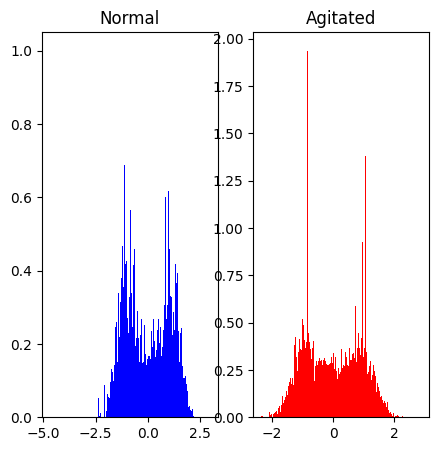

In [64]:
# plt.imshow(enc_pred[0,0,:,:,255])
print(normal_pred.shape)
normal_code= normal_pred[0].flatten()
abnormal_code= abnormal_pred[0].flatten()

# print("Mean: " + str(code.mean()))
# print("Std: " + str(code.std()))

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(5,5))
axes[0].hist(normal_code, bins=2000, density=True, color='blue')
axes[0].set_title("Normal")
axes[1].hist(abnormal_code, bins=2000, density=True, color='red')
axes[1].set_title("Agitated")

In [58]:
print(abnormal_pred.shape)

print("Mean: " + str(code.mean()))
print("Std: " + str(code.std()))

(1, 4, 8, 8, 256)
Mean: -0.006384031
Std: 0.9223798


0.00836245